In [ ]:
!pip install -r /root/requirements.txt

In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
import xgboost as xgb 
import lightgbm as lgbm
from HROCH import PHCRegressor
import optuna
from optuna.samplers import TPESampler
import warnings
warnings.simplefilter('ignore')
import os
os.chdir("/root/")

ModuleNotFoundError: No module named 'xgboost'

In [3]:
train = pd.read_csv('data/raw/train/train.csv').drop('Id',axis=1)
target = 'quality'
features = [c for c in train.columns if c not in ['id','Time', target]]
#combine with original training set
orig_train = pd.read_csv('data/raw/train/orig_train.csv')
orig_train = orig_train[~orig_train.duplicated()]
train = pd.concat([train,orig_train]).reset_index(drop=True)
train['split']= 'train'
test = pd.read_csv('data/raw/test/test.csv').drop('Id',axis=1)
test['split'] = 'test'
data = pd.concat([train, test]).reset_index(drop=True)
sub = pd.read_csv('data/raw/submission/submission.csv')

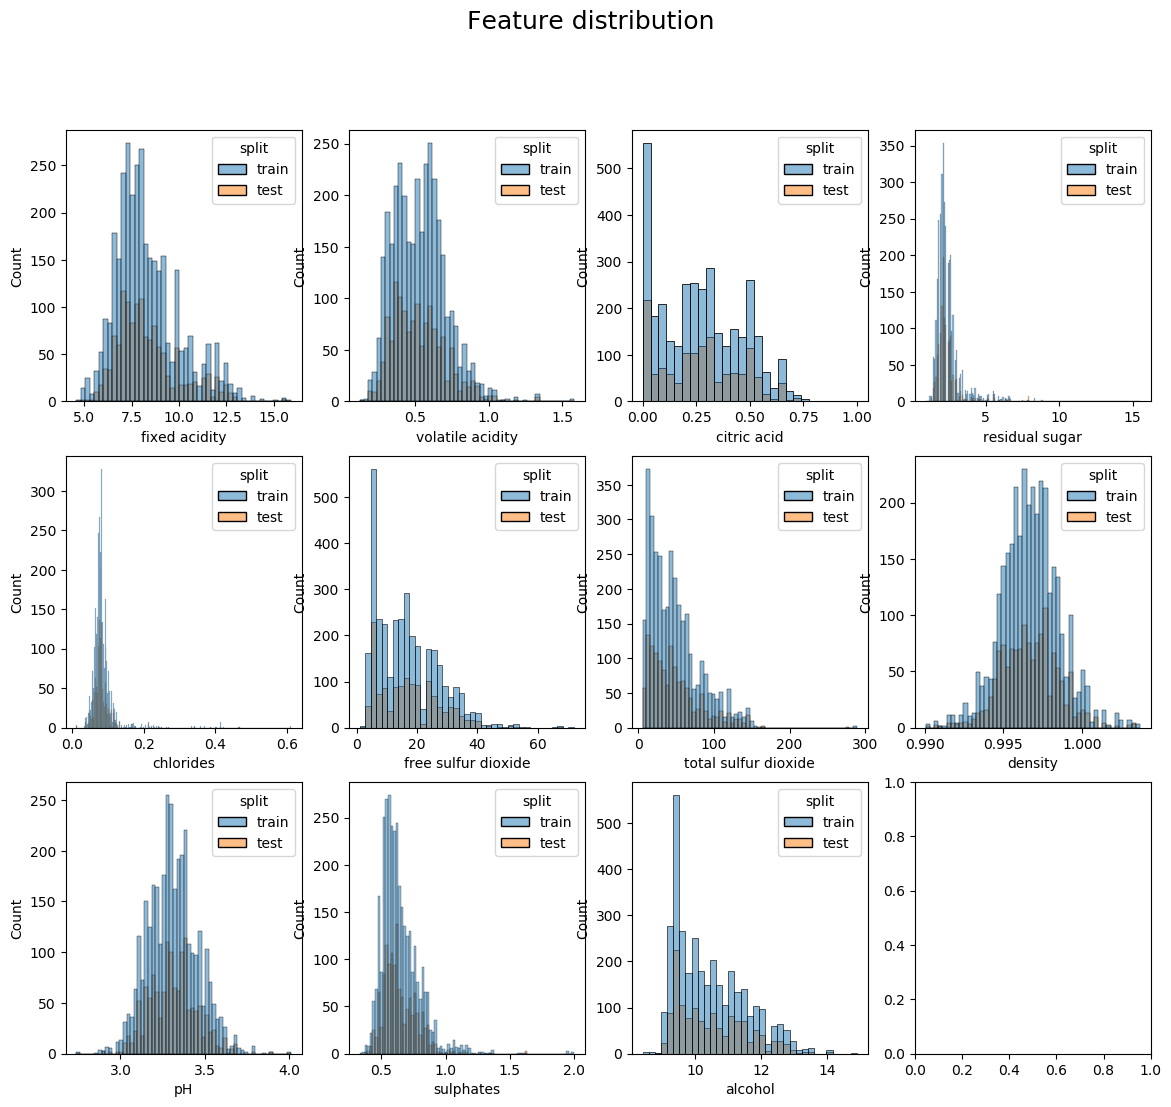

In [6]:
features = [f for f in train.columns if f not in ['split', target]]
fig, axs = plt.subplots(3,4, figsize=(14,12))

for f, ax in zip(features, axs.ravel()):
    sns.histplot(data, x=f, hue='split', ax=ax)
plt.suptitle('Feature distribution', size=18)
plt.show()

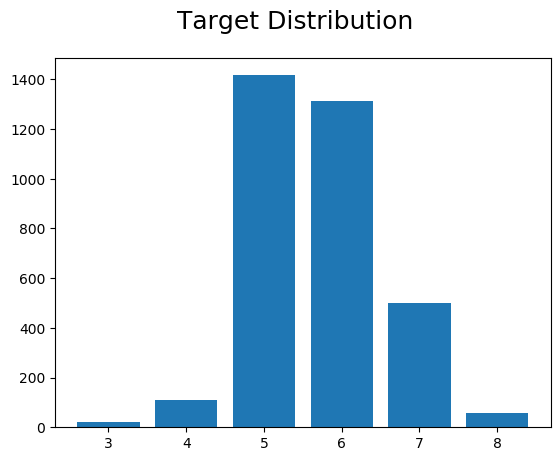

In [7]:
vc = train[target].value_counts()
n_classes = vc.nunique()
plt.bar(vc.index, vc)
plt.suptitle('Target Distribution', size=18)
plt.show()

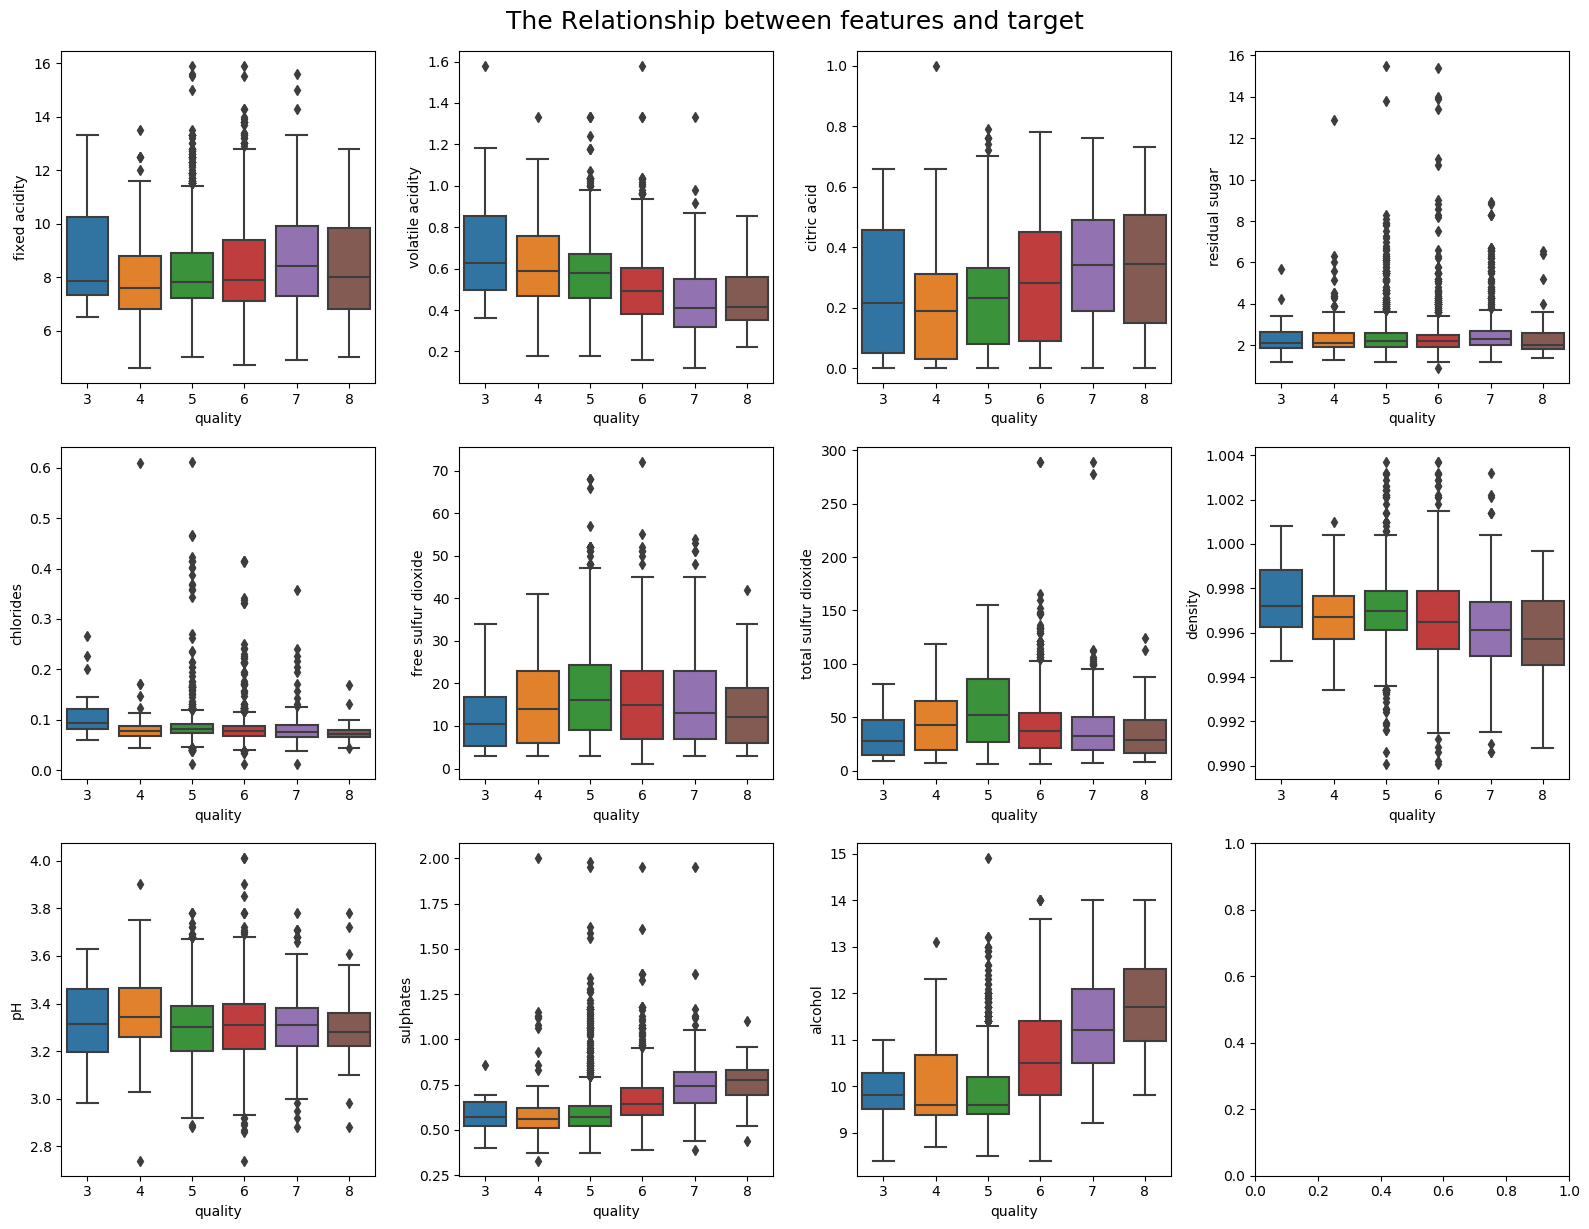

In [8]:
fig, axs = plt.subplots(3,4, figsize=(16,12))

for f, ax in zip(features,axs.ravel()):
    sns.boxplot(data=train, x=target,y= f, ax=ax)
plt.suptitle("The Relationship between features and target", y=1.02, size=18)
plt.tight_layout()
plt.show()

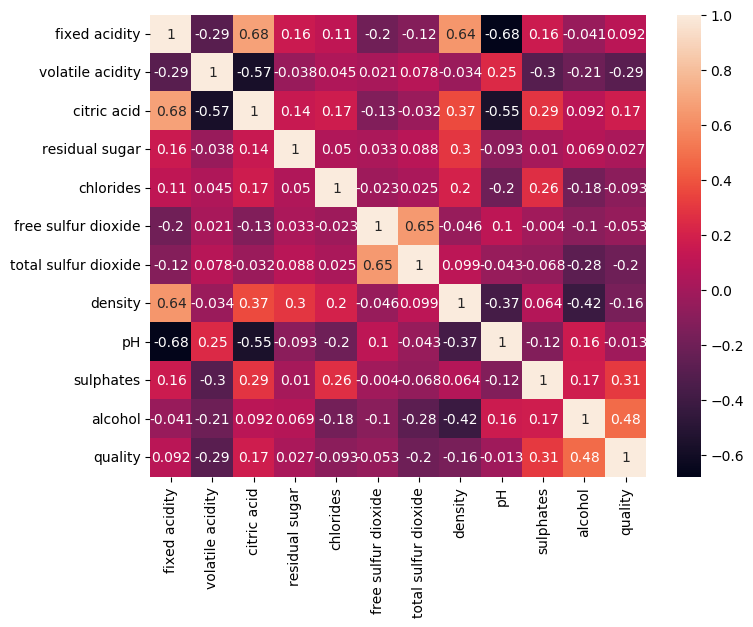

In [9]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
matrix = train.corr()
sns.heatmap(matrix, annot=True)
plt.show()